# Gráficos

Una parte fundamental del análisis de datos es la exploración y visualización de los mismos, lo cual se suele llevar a cabo a través de gráficos.

[Matplotlib](https://matplotlib.org/) es una librería que nos permite generar gráficos a partir de nuestros datos de manera rápida y con calidad de publicación.

## Importando matplotlib

Una de las formas más sencillas de hacer uso de esta librería es a través del módulo `pyplot`, al cual lo solemos importar bajo el alias `plt`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Graficando datos

Recolectemos algunos datos de variación normal de la temperatura atmosférica con respecto a la altitud sobre el nivel del mar ([International Standard Atmosphere](https://en.wikipedia.org/wiki/International_Standard_Atmosphere)) y los guardamos en un archivo `temperatura_atmosferica.dat`. Las alturas están en metros sobre el nivel del mar y las temperaturas en grados Celsius.

Usemos la función `numpy.loadtxt` para leer el archivo.

In [2]:
from pathlib import Path # Definimos el path a la carpeta de datos
data_folder = Path("..") / "data"
temperatura_atmosferica_file = data_folder /"temperatura_atmosferica.dat"

In [3]:
datos = np.loadtxt(temperatura_atmosferica_file)

In [4]:
datos

array([[-6.1000e+02,  1.9000e+01],
       [ 1.1000e+04, -5.6500e+01],
       [ 2.0000e+04, -5.6500e+01],
       [ 3.2000e+04, -4.4500e+01],
       [ 4.7000e+04, -2.5000e+00],
       [ 5.1000e+04, -2.5000e+00],
       [ 7.1000e+04, -5.8500e+01],
       [ 8.4852e+04, -8.6280e+01]])

Podemos extraer las columnas correspondiente a las alturas y temperaturas del array `datos`

In [5]:
altura, temperatura = datos[:, 0], datos[:, 1]

Grafiquemos estos valores:

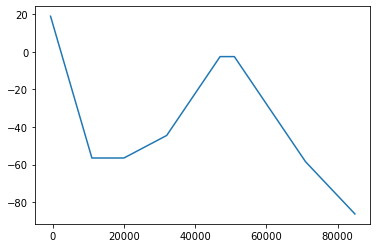

In [6]:
plt.plot(altura, temperatura)
plt.show()

Matplotlib nos permite modificar los marcadores del gráfico

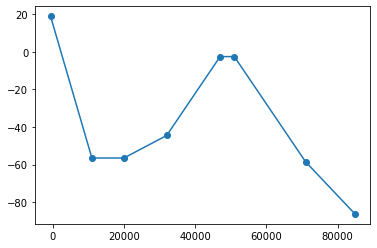

In [7]:
plt.plot(altura, temperatura, "o-")
plt.show()

Una buena práctica es anotar los ejes coordenados, agregar un título al gráfico y decoraciones adicionales como el grid.

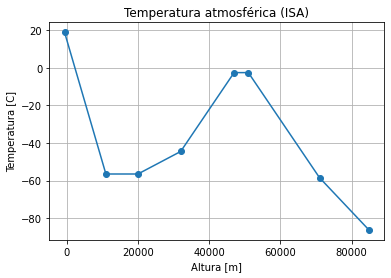

In [8]:
plt.plot(altura, temperatura, "o-")
plt.xlabel("Altura [m]")
plt.ylabel("Temperatura [C]")
plt.title("Temperatura atmosférica (ISA)")
plt.grid()
plt.show()

Matplotlib nos permite guardar la gráfica como una imagen png:

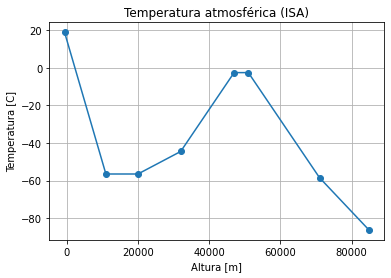

In [9]:
plt.plot(altura, temperatura, "o-")
plt.xlabel("Altura [m]")
plt.ylabel("Temperatura [C]")
plt.title("Temperatura atmosférica (ISA)")
plt.grid()
plt.savefig("temperatura_atmosferica.png", dpi=300)
plt.show()

O bien como PDF (imagen vectorial):

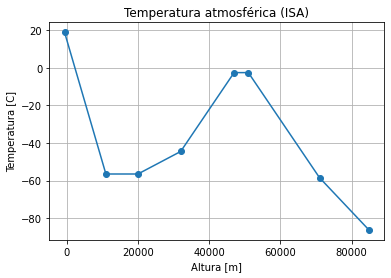

In [10]:
plt.plot(altura, temperatura, "o-")
plt.xlabel("Altura [m]")
plt.ylabel("Temperatura [C]")
plt.title("Temperatura atmosférica (ISA)")
plt.grid()
plt.savefig("temperatura_atmosferica.pdf")
plt.show()

## Graficando funciones

Muchas veces deseamos visualizar gráficamente una función matemática que depende de cierta variable.
Por ejemplo, grafiquemos la función seno entre 0 y 2$\pi$.

In [11]:
x = np.linspace(0, 2 * np.pi, 100)
print(x)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

In [12]:
y = np.sin(x)

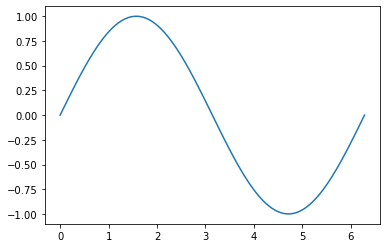

In [13]:
plt.plot(x, y)
plt.show()

## Múltiples curvas en un mismo gráfico

¿Cómo podemos incluir varias curvas en un mismo gráfico?

In [14]:
print(x)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

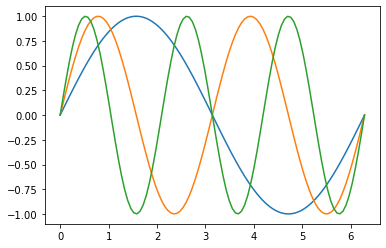

In [15]:
plt.plot(x, np.sin(x))
plt.plot(x, np.sin(2 * x))
plt.plot(x, np.sin(3 * x))

plt.show()

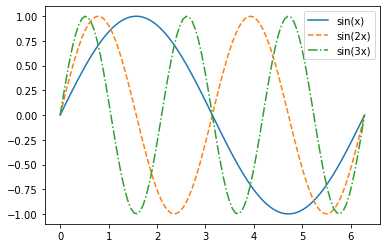

In [16]:
plt.plot(x, np.sin(x), linestyle="-", label="sin(x)")
plt.plot(x, np.sin(2 * x), linestyle="--", label="sin(2x)")
plt.plot(x, np.sin(3 * x), linestyle="-.", label="sin(3x)")

plt.legend()
plt.show()

## Ejercicio:

La función gaussiana centrada en cero puede ser escrita como:

$$ g(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{1}{2}\left(\frac{x}{\sigma}\right)^2 }. $$

Analicemos gráficamente cómo diferentes valores de sigma modifican la forma de la curva de $g(x)$.

1. Realice una gráfica de la función gaussiana con al menos tres valores de $\sigma$.
2. La gráfica debe tener:
    - ambos ejes identificados,
    - un título, y
    - una leyenda.

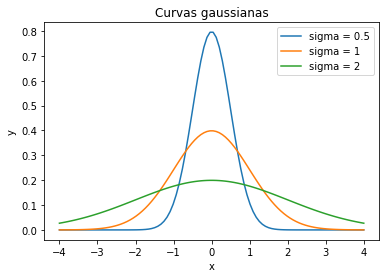

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# Definimos un array con 100 valores de x entre -4 y 4
x = np.linspace(-4, 4, 100)

# Evaluamos la gaussiana para distintos valores de sigma
sigmas = [0.5, 1, 2]
for sigma in sigmas:
    gaussian = 1 / sigma * 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * (x / sigma) ** 2)
    label = "sigma = " + str(sigma)
    plt.plot(x, gaussian, label=label)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Curvas gaussianas")
plt.show()